In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import category_encoders as ce


In [2]:
data = pd.read_csv("/Users/natasha/Desktop/Ualbany Courses/Fall Sem Courses 2023/CINF 528/Credit Scoring Project - 528/Credit Scoring Project/train.csv" , sep = "," ,na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Description

1. ID: An identifier for each record in the dataset.
2. Customer_ID: Identifier for individual customers.
3. Month: The month associated with the data entry.
4. Name: Customer's name.
5. Age: Customer's age.
6. SSN: Social Security Number or some other form of identification.
7. Occupation: Customer's occupation or job title.
8. Annual_Income: Customer's annual income.
9. Monthly_Inhand_Salary: The amount of money the customer receives as salary on a monthly basis.
10. Num_Bank_Accounts: Number of bank accounts the customer has.
11. Num_Credit_Card: Number of credit cards the customer possesses.
12. Interest_Rate: The interest rate associated with some financial aspect (e.g., loans or credit cards).
13. Num_of_Loan: Number of loans the customer has.
14. Type_of_Loan: The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).
15. Delay_from_due_date: Delay in payments from the due date.
16. Num_of_Delayed_Payment: Number of delayed payments.
17. Changed_Credit_Limit: Indicates if the customer has changed their credit limit.
18. Num_Credit_Inquiries: Number of credit inquiries made by the customer.
19. Credit_Mix: The mix of different types of credit accounts (e.g., credit cards, loans).
20. Outstanding_Debt: The amount of outstanding debt.
21. Credit_Utilization_Ratio: The ratio of credit used to the total credit limit.
22. Credit_History_Age: The age of the customer's credit history.
23. Payment_of_Min_Amount: Payment behavior regarding minimum required payments.
24. Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments made by the customer.
25. Amount_invested_monthly: The amount the customer invests on a monthly basis.
26. Payment_Behaviour: Behavior related to payments, possibly indicating patterns or trends.
27. Monthly_Balance: The customer's monthly balance in their financial accounts.
28. Credit_Score: The credit score associated with the customer's creditworthiness.

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
rows, cols = data.shape
print("Rows: " + str(rows) + "\nColumns: " + str(cols) )

Rows: 100000
Columns: 28


In [5]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,10.389025,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,6.789496,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.320000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.870000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000


In [8]:
data["Month"] = pd.to_datetime(data['Month'], format='%B').dt.month

In [9]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Removing Unwanted columns from the Database like Unique Identifiers except ID column

In [10]:
data = data.drop(columns=["Name","SSN"])

In [11]:
data.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23,Scientist,19114.12,1824.843333,3,4,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,-500,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
data.dtypes

ID                           object
Customer_ID                  object
Month                         int64
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

#### Integer column- Age, Num_of_Loan
#### Float columns - Num_of_Delayed_Payment, Annual_Income, Outstanding_Debt , Amount_invested_monthly, Monthly_Balance
#### Binary Columns - Payment_of_Min_Amount

In [14]:
data["Age"] = data["Age"].str.extract("(\d+)").astype(int)

data["Num_of_Loan"] = data["Num_of_Loan"].str.extract("(\d+)").astype(int)

data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].str.extract("(\d+)").astype(float)

data["Annual_Income"] = data["Annual_Income"].str.extract(r'(\d+\.\d+)').astype(float)

data["Outstanding_Debt"] = data["Outstanding_Debt"].str.extract(r'(\d+\.\d+)').astype(float)

data["Amount_invested_monthly"] = data["Amount_invested_monthly"].str.extract(r'(\d+\.\d+)').astype(float)

data["Monthly_Balance"] = data["Monthly_Balance"].str.extract(r'(\d+\.\d+)').astype(float)

data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map( 
                   {'yes':True ,'no':False}) 

data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].astype(bool)

data.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,4.500000,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.164483
std,2.291299,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.644217
min,1.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,2.750000,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,269.998334
50%,4.500000,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.472111
75%,6.250000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,469.652004
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


## Cleaning

### Age Column

#### Looks like there are some random values in the Age column since mean is 119.5 and max is 8698

In [15]:
def clean_age(group):
    min_age = group['Age'].min()
    max_age = group['Age'].max()
    group['Age'] = group['Age'].apply(lambda x: min_age if x < 14 or x > 70 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(clean_age).reset_index(drop=True)

In [16]:
data.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23,Scientist,19114.12,1824.843333,3,4,3,...,NaN,809.98,26.822620,22 Years and 1 Months,True,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,True,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,True,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,True,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,True,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Occupation column

In [17]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,28,NaN,34847.84,3037.986667,2,4,6,...,Good,605.03,24.464031,26 Years and 7 Months,True,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
16,0x161a,CUS_0x2dbc,1,34,NaN,143162.64,12187.220000,1,5,8,...,Good,1303.01,28.616735,17 Years and 9 Months,True,246.992319,168.413703,NaN,1043.315978,Good
18,0x161c,CUS_0x2dbc,3,34,NaN,143162.64,NaN,1,5,8,...,Good,1303.01,26.519815,17 Years and 11 Months,True,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
20,0x161e,CUS_0x2dbc,5,34,NaN,143162.64,12187.220000,1,5,8,...,Good,1303.01,31.376150,18 Years and 1 Months,True,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
29,0x162b,CUS_0xb891,6,55,NaN,30689.89,2612.490833,2,5,4,...,NaN,632.46,27.445422,17 Years and 8 Months,True,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,1,37,NaN,139664.96,11777.746667,3,6,12,...,NaN,365.66,31.043048,29 Years and 7 Months,True,423.731016,282.782346,High_spent_Large_value_payments,NaN,Standard
99935,0x25f8d,CUS_0xb11c,8,38,NaN,15319.65,1460.637500,6,7,15,...,Bad,1453.61,34.557510,11 Years and 4 Months,True,28.182033,191.877779,Low_spent_Small_value_payments,NaN,Poor
99937,0x25f93,CUS_0xad4f,2,47,NaN,22620.79,1722.065833,7,3,9,...,Standard,642.46,31.841872,NaN,True,0.000000,105.076293,Low_spent_Large_value_payments,NaN,Standard
99943,0x25f99,CUS_0xad4f,8,48,NaN,22620.79,NaN,6,2,9,...,NaN,642.46,34.026427,29 Years and 10 Months,True,0.000000,205.217280,Low_spent_Small_value_payments,NaN,Poor


There are multiple rows in the Occupation column which are null. However since there is a repetition of the customers, we can use one of the rows which do have Occupation to fill the other rows for the same customer.

In [18]:
all_occupations = data.dropna(subset=['Occupation']).set_index('Customer_ID')['Occupation'].to_dict()

In [19]:
data['Occupation'] = data.apply(lambda row: all_occupations.get(row['Customer_ID'], row['Occupation']), axis=1)

### Type of Loan

In [20]:
data[data['Type_of_Loan'].isnull()]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,1,21,Developer,35547.71,2853.309167,7,5,5,...,Standard,943.86,39.797764,30 Years and 8 Months,True,0.0,276.725394,NaN,288.605522,Standard
33,0x1633,CUS_0x1cdb,2,21,Developer,35547.71,NaN,7,5,5,...,Standard,943.86,27.020360,30 Years and 9 Months,True,0.0,74.443641,High_spent_Medium_value_payments,460.887276,Standard
34,0x1634,CUS_0x1cdb,3,21,Developer,35547.71,2853.309167,7,5,5,...,Standard,943.86,23.462303,30 Years and 10 Months,True,0.0,173.138651,Low_spent_Medium_value_payments,392.192266,Standard
35,0x1635,CUS_0x1cdb,4,21,Developer,35547.71,2853.309167,7,5,5,...,NaN,943.86,28.924954,30 Years and 11 Months,True,0.0,96.785485,High_spent_Medium_value_payments,438.545432,Standard
36,0x1636,CUS_0x1cdb,5,21,Developer,35547.71,2853.309167,7,5,5,...,NaN,943.86,41.776187,31 Years and 0 Months,True,0.0,62.723278,High_spent_Small_value_payments,482.607638,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,4,47,Developer,22620.79,1722.065833,7,3,9,...,NaN,642.46,26.730863,29 Years and 6 Months,True,0.0,205.756074,Low_spent_Small_value_payments,NaN,Poor
99940,0x25f96,CUS_0xad4f,5,47,Developer,22620.79,1722.065833,7,3,9,...,Standard,642.46,37.450793,29 Years and 7 Months,True,0.0,141.895743,Low_spent_Large_value_payments,NaN,Standard
99941,0x25f97,CUS_0xad4f,6,47,Developer,22620.79,1722.065833,7,3,9,...,Standard,642.46,27.699504,NaN,True,0.0,207.473456,Low_spent_Small_value_payments,NaN,Poor
99942,0x25f98,CUS_0xad4f,7,48,Developer,22620.79,1722.065833,6,2,9,...,Standard,642.46,24.714779,29 Years and 9 Months,True,0.0,16.532189,High_spent_Large_value_payments,NaN,Poor


In [21]:
data['Type_of_Loan'].fillna('NA', inplace=True)

### Changed Credit Limit

In [22]:
data[data['Changed_Credit_Limit'].isnull()]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,3,23,Scientist,19114.120,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,True,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
65,0x1663,CUS_0x4157,2,23,Doctor,114838.410,9843.867500,2,5,7,...,Good,1377.74,27.626325,21 Years and 5 Months,True,226.892792,212.235602,High_spent_Large_value_payments,785.258356,Good
66,0x1664,CUS_0x4157,3,23,Doctor,114838.410,NaN,2,5,7,...,Good,1377.74,35.141567,21 Years and 6 Months,True,226.892792,470.385796,High_spent_Small_value_payments,547.108162,Good
109,0x16a3,CUS_0x6c66,6,39,Manager,8701.545,519.128750,6,5,32,...,Standard,2602.69,28.570031,9 Years and 4 Months,True,36.548197,52.931613,Low_spent_Medium_value_payments,242.433064,Poor
110,0x16a4,CUS_0x6c66,7,39,Manager,8701.545,NaN,6,5,32,...,Standard,2602.69,38.465415,NaN,True,36.548197,30.471806,Low_spent_Medium_value_payments,264.892872,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,5,28,Writer,29090.500,2472.208333,5,7,20,...,NaN,1612.70,26.151395,16 Years and 2 Months,True,67.439731,35.401299,High_spent_Medium_value_payments,NaN,Poor
99618,0x25db4,CUS_0xae66,3,30,Writer,142560.360,11773.030000,6,3,13,...,Standard,220.75,35.576245,17 Years and 5 Months,True,76.772094,194.787477,High_spent_Large_value_payments,NaN,Standard
99800,0x25ec6,CUS_0x1232,1,16,Developer,14937.490,NaN,8,8,22,...,Bad,3699.44,23.574545,13 Years and 2 Months,True,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard
99892,0x25f4e,CUS_0x89aa,5,38,Manager,85744.120,NaN,6,7,11,...,Standard,717.79,29.513156,NaN,True,72.099176,88.010458,High_spent_Large_value_payments,NaN,Standard


In [23]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.interpolate(method='index', limit_direction='both'))

In [24]:
data[data['Changed_Credit_Limit'].isnull()]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### Num Credit Inquiries

In [25]:
data[data['Num_Credit_Inquiries'].isnull()]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,3,34,Engineer,143162.640,NaN,1,5,8,...,Good,1303.01,26.519815,17 Years and 11 Months,True,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
47,0x1645,CUS_0x95ee,8,31,Lawyer,73928.460,5988.705000,4,5,8,...,Good,548.20,31.580990,32 Years and 6 Months,True,0.000000,42.635590,NaN,796.234910,Good
113,0x16ab,CUS_0xff4,2,36,Entrepreneur,25546.260,NaN,8,7,14,...,Standard,758.44,29.711376,18 Years and 3 Months,True,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
115,0x16ad,CUS_0xff4,4,37,Entrepreneur,25546.260,2415.855000,8,7,14,...,Standard,758.44,35.946278,18 Years and 5 Months,True,101.328637,83.714750,High_spent_Medium_value_payments,306.542112,Standard
187,0x1719,CUS_0x5b48,4,32,Lawyer,12600.445,782.037083,5,5,10,...,Standard,569.80,28.819407,12 Years and 6 Months,True,33746.000000,31.149198,Low_spent_Medium_value_payments,300.994163,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,0x25e96,CUS_0xc345,1,23,Architect,60015.320,NaN,7,4,14,...,Standard,1095.15,29.272858,15 Years and 2 Months,True,13580.000000,136.685509,High_spent_Medium_value_payments,NaN,Standard
99852,0x25f12,CUS_0x3048,5,40,Scientist,81093.160,7017.763333,10,7,17,...,Bad,4523.30,27.419316,9 Years and 9 Months,True,409.039442,741.567333,Low_spent_Small_value_payments,NaN,Standard
99874,0x25f34,CUS_0x3855,3,27,Scientist,118677.540,9963.795000,4,4,6,...,NaN,995.47,32.808662,NaN,True,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
99900,0x25f5a,CUS_0x4986,5,33,Entrepreneur,41329.560,3421.130000,2,3,7,...,NaN,1245.01,35.367709,NaN,True,20.553577,126.576130,Low_spent_Medium_value_payments,NaN,Good


In [26]:
customer_ids = data[(data['Num_Credit_Inquiries'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [27]:
customer_ids = data[(data['Num_Credit_Inquiries'] > 15) ]['Customer_ID'].values

for id in customer_ids:

    mode_v = data[data['Customer_ID'] == id]['Num_Credit_Inquiries'].mode()[0]

    data.loc[(data['Customer_ID'] == id) &
                ((data['Num_Credit_Inquiries'] > 15) ),
                ['Num_Credit_Inquiries']]=mode_v

### Credit Mix

In [28]:
# Create a dictionary to map Customer_ID to non-null Credit_Mix values
Credit_Mix_mapping = data.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Fill missing Credit_Mix values based on Customer_ID
data['Credit_Mix'] = data.apply(lambda row: Credit_Mix_mapping.get(row['Customer_ID'], row['Credit_Mix']), axis=1)

### Num of Delayed Payment

In [29]:
customer_ids = data[(data['Num_of_Delayed_Payment'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

### Monthly Inhand Salary

In [30]:
# Create a dictionary to map Customer_ID to non-null Monthly_Inhand_Salary values
Monthly_Inhand_Salary_mapping = data.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Fill missing Monthly_Inhand_Salary values based on Customer_ID
data['Monthly_Inhand_Salary'] = data.apply(lambda row: Monthly_Inhand_Salary_mapping.get(row['Customer_ID'], row['Monthly_Inhand_Salary']), axis=1)

In [31]:
customer_ids = data[(data['Amount_invested_monthly'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

### Payment Behaviour

In [32]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    mode_values = series.dropna().mode()
    if mode_values.empty:
        return np.nan
    return mode_values.iloc[0]

# Calculate the mode payment behavior for each customer
customer_mode_payment = data.groupby('Customer_ID')['Payment_Behaviour'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(customer_mode_payment)


### Monthly Balance

In [33]:
customer_ids = data[(data['Monthly_Balance'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

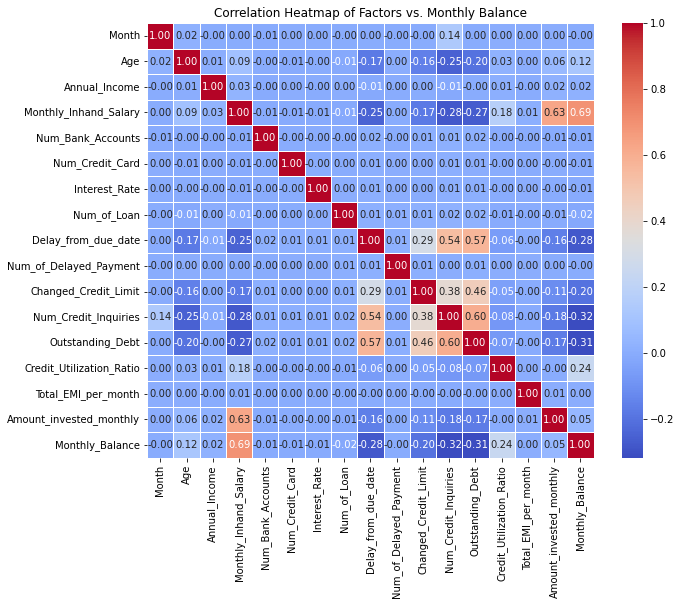

In [37]:
selected_columns = data.select_dtypes(include=['number'])
# selected_columns = data.select_dtypes(include=['number'])


correlation_matrix = selected_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [38]:
imputer = SimpleImputer(strategy='most_frequent')  

data['Monthly_Balance'] = imputer.fit_transform(data[['Monthly_Balance']])

In [39]:
customer_mode_payment = data.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(customer_mode_payment)

### Credit History Age

In [40]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [41]:
data.Credit_History_Age = data.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)

In [42]:
customer_ids = data[(data['Credit_History_Age'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [43]:
data["Credit_History_Age"]

0        265.0
1        266.0
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

### Removing Outliers

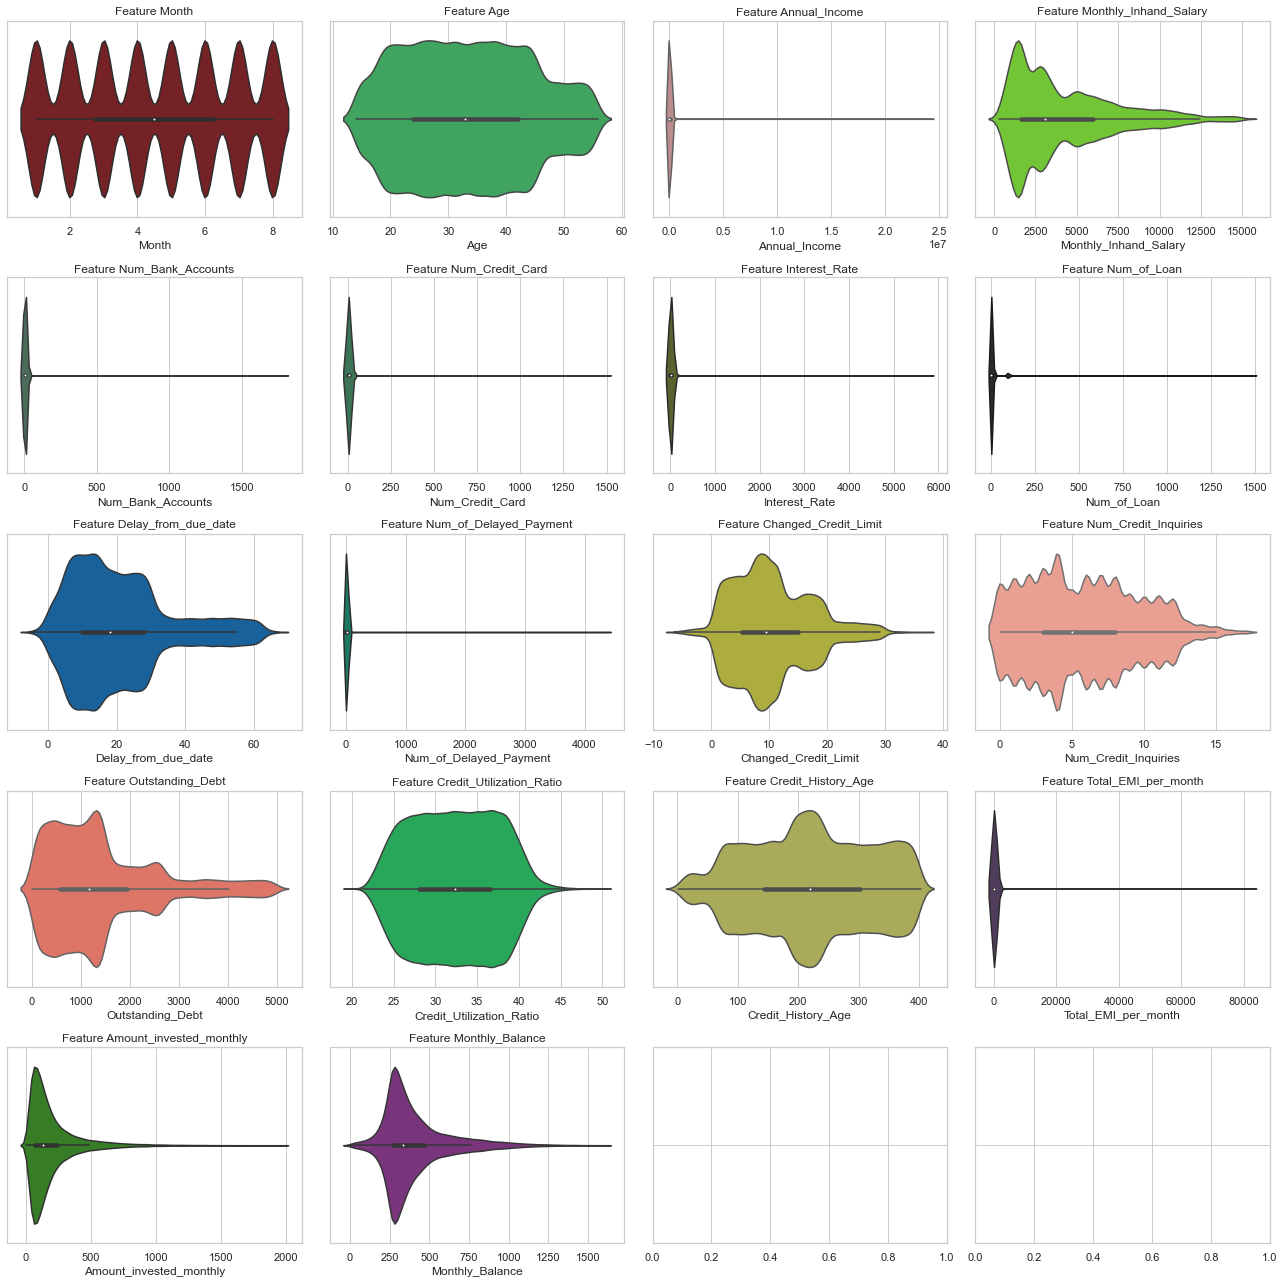

In [44]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  


plt.tight_layout()

plt.show()

In [45]:
data['Age'].describe()

count    100000.000000
mean         33.303370
std          10.764915
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

### Interest rate

In [46]:
data['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

Looks like there are some impossible values since the max is 5797% which is not possible. Hence we will have to replace these values

In [47]:
def replace_Interest_Rate(group):
    min_Interest_Rate = group['Interest_Rate'].min()
    max_Interest_Rate = group['Interest_Rate'].max()
    group['Interest_Rate'] = group['Interest_Rate'].apply(lambda x: min_Interest_Rate if x < 1 or x > 40 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Interest_Rate).reset_index(drop=True)

In [48]:
data['Interest_Rate'].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

### Annual Income

In [49]:
data['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Looks like the max annual income is at 24 million. Looking at who this belongs to and if this customer occurs multiple times in the data.

In [50]:
max(data['Annual_Income'])

24198062.0

In [51]:
data[data['Annual_Income'] == max(data['Annual_Income'])]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48302,0x13104,CUS_0xcfc,7,31,Engineer,24198062.0,1135.525417,4,5,5,...,Good,672.49,34.790192,220.0,True,46.388945,53.573863,Low_spent_Large_value_payments,283.589734,Good


In [52]:
data[data['Customer_ID'] == 'CUS_0xcfc']

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48296,0x130fe,CUS_0xcfc,1,31,Engineer,1.533031e+04,1135.525417,4,5,5,...,Good,672.49,37.008636,214.0,True,46.388945,139.367430,Low_spent_Small_value_payments,217.796167,Good
48297,0x130ff,CUS_0xcfc,2,31,Engineer,1.533031e+04,1135.525417,4,5,5,...,Good,672.49,34.865078,215.0,True,46.388945,69.407045,Low_spent_Small_value_payments,287.756552,Good
48298,0x13100,CUS_0xcfc,3,31,Engineer,1.533031e+04,1135.525417,4,5,5,...,Good,672.49,32.991519,216.0,True,46.388945,65.974120,Low_spent_Small_value_payments,291.189477,Standard
48299,0x13101,CUS_0xcfc,4,31,Engineer,1.533031e+04,1135.525417,4,5,5,...,Good,672.49,37.551313,217.0,True,46.388945,39.631905,High_spent_Medium_value_payments,277.531692,Good
48300,0x13102,CUS_0xcfc,5,31,Engineer,1.533031e+04,1135.525417,715,745,5,...,Good,672.49,26.381751,218.0,True,46.388945,57.877309,Low_spent_Small_value_payments,293.661091,Standard
48301,0x13103,CUS_0xcfc,6,31,Engineer,1.533031e+04,1135.525417,4,106,5,...,Good,672.49,31.863006,219.0,True,46.388945,76.122713,Low_spent_Small_value_payments,281.040884,Good
48302,0x13104,CUS_0xcfc,7,31,Engineer,2.419806e+07,1135.525417,4,5,5,...,Good,672.49,34.790192,220.0,True,46.388945,53.573863,Low_spent_Large_value_payments,283.589734,Good
48303,0x13105,CUS_0xcfc,8,31,Engineer,1.533031e+04,1135.525417,4,5,5,...,Good,672.49,25.389565,221.0,True,46.388945,118.632184,Low_spent_Small_value_payments,238.531413,Standard


It looks like 24198062.0 maybe incorrect for this customer. There could be multiple instances of this which needs to be fixed

In [53]:
def replace_Annual_Income(group):
    min_Annual_Income = group['Annual_Income'].min()
    max_Annual_Income = group['Annual_Income'].max()
    group['Annual_Income'] = group['Annual_Income'].apply(lambda x: min_Annual_Income if  x > 0.2e+06 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Annual_Income).reset_index(drop=True)

In [54]:
data['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

### Number of Credit Cards

In [55]:
data['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

1499 credit cards are not possible. Which suggests the same problem as Annual Income

In [56]:
def replace_Num_Credit_Card(group):
    min_Num_Credit_Card = group['Num_Credit_Card'].min()
    max_Num_Credit_Card = group['Num_Credit_Card'].max()
    group['Num_Credit_Card'] = group['Num_Credit_Card'].apply(lambda x: min_Num_Credit_Card if x <1 or x > 15 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Credit_Card).reset_index(drop=True)

In [57]:
data['Num_Credit_Card'].describe()

count    100000.000000
mean          5.533600
std           2.067683
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          15.000000
Name: Num_Credit_Card, dtype: float64

### Num of Delayed Payment

In [58]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.898505
std         222.891352
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

We will use the same method to replace the abnormally high delayed payments

In [59]:
def replace_Num_of_Delayed_Payment(group):
    min_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].min()
    max_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].max()
    group['Num_of_Delayed_Payment'] = group['Num_of_Delayed_Payment'].apply(lambda x: min_Num_of_Delayed_Payment if x <1 or x > 40 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Delayed_Payment).reset_index(drop=True)

In [60]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.325213
std           6.262664
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          34.000000
Name: Num_of_Delayed_Payment, dtype: float64

### Num of Bank Accounts

In [61]:
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [71]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].abs()
def replace_Num_Bank_Accounts(group):
    min_Num_Bank_Accounts = group['Num_Bank_Accounts'].min()
    max_Num_Bank_Accounts = group['Num_Bank_Accounts'].max()
    group['Num_Bank_Accounts'] = group['Num_Bank_Accounts'].apply(lambda x: min_Num_Bank_Accounts if x <1 or x > 20 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Bank_Accounts).reset_index(drop=True)

In [72]:
data['Num_Bank_Accounts'].value_counts()

6     13177
7     12996
8     12941
4     12346
5     12297
3     12105
9      5500
10     5329
1      4561
0      4396
2      4342
11        9
18        1
Name: Num_Bank_Accounts, dtype: int64

In [73]:
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.368980
std           2.593184
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: Num_Bank_Accounts, dtype: float64

### Num of Loan

In [74]:
data[data['Num_of_Loan']>10]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [75]:
data['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

In [76]:
def replace_Num_of_Loan(group):
    min_Num_of_Loan = group['Num_of_Loan'].min()
    max_Num_of_Loan = group['Num_of_Loan'].max()
    group['Num_of_Loan'] = group['Num_of_Loan'].apply(lambda x: min_Num_of_Loan if x <1 or x > 10 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Loan).reset_index(drop=True)

In [77]:
data['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

### Total EMI per month

In [78]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean         98.793647
std          98.376351
min           0.000000
25%          28.830800
50%          65.645774
75%         143.185801
max        1042.674209
Name: Total_EMI_per_month, dtype: float64

In [79]:
def replace_Total_EMI_per_month(group):
    min_Total_EMI_per_month = group['Total_EMI_per_month'].min()
    max_Total_EMI_per_month = group['Total_EMI_per_month'].max()
    group['Total_EMI_per_month'] = group['Total_EMI_per_month'].apply(lambda x: min_Total_EMI_per_month if x <1 or x > 400 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Total_EMI_per_month).reset_index(drop=True)

In [80]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean         98.793647
std          98.376351
min           0.000000
25%          28.830800
50%          65.645774
75%         143.185801
max        1042.674209
Name: Total_EMI_per_month, dtype: float64

### Amount invested monthly

In [81]:
data['Amount_invested_monthly'].describe()

count    100000.000000
mean        195.888840
std         198.056716
min           0.000000
25%          73.120365
50%         129.785283
75%         238.081272
max        1977.326102
Name: Amount_invested_monthly, dtype: float64

In [82]:
data[data['Amount_invested_monthly'] == max(data['Amount_invested_monthly'])]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31815,0xd069,CUS_0x2617,8,38,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,26.97148,206.0,True,457.585683,1977.326102,Low_spent_Small_value_payments,329.485593,Standard


In [83]:
data[data['Customer_ID'] == 'CUS_0x2617']

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31808,0xd062,CUS_0x2617,1,37,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,39.525573,199.0,True,457.585683,892.325332,High_spent_Small_value_payments,423.758651,Good
31809,0xd063,CUS_0x2617,2,37,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,40.343276,200.0,True,457.585683,462.347336,Low_spent_Large_value_payments,863.736647,Good
31810,0xd064,CUS_0x2617,3,37,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,33.448045,201.0,True,457.585683,1013.300839,High_spent_Medium_value_payments,332.783145,Good
31811,0xd065,CUS_0x2617,4,37,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,32.959306,202.0,True,457.585683,598.943487,High_spent_Medium_value_payments,707.140496,Good
31812,0xd066,CUS_0x2617,5,37,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,32.685052,203.0,True,457.585683,728.161788,High_spent_Medium_value_payments,945.605664,Good
31813,0xd067,CUS_0x2617,6,38,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,35.621594,204.0,True,457.585683,857.380089,High_spent_Large_value_payments,1002.220198,Good
31814,0xd068,CUS_0x2617,7,38,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,28.834973,205.0,True,457.585683,986.598390,High_spent_Small_value_payments,329.485593,Good
31815,0xd069,CUS_0x2617,8,38,Architect,179072.36,15136.696667,2,2,5,...,Good,269.2,26.971480,206.0,True,457.585683,1977.326102,Low_spent_Small_value_payments,329.485593,Standard


In [84]:
def replace_Amount_invested_monthly(group):
    min_Amount_invested_monthly = group['Amount_invested_monthly'].min()
    max_Amount_invested_monthly = group['Amount_invested_monthly'].max()
    group['Amount_invested_monthly'] = group['Amount_invested_monthly'].apply(lambda x: min_Amount_invested_monthly if x <1 or x > 800 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Amount_invested_monthly).reset_index(drop=True)

In [85]:
data['Amount_invested_monthly'].describe()

count    100000.000000
mean        176.264024
std         150.669373
min           0.000000
25%          72.774053
50%         127.087701
75%         224.730130
max         799.845975
Name: Amount_invested_monthly, dtype: float64

### Final Violin Plot after removing Outliers

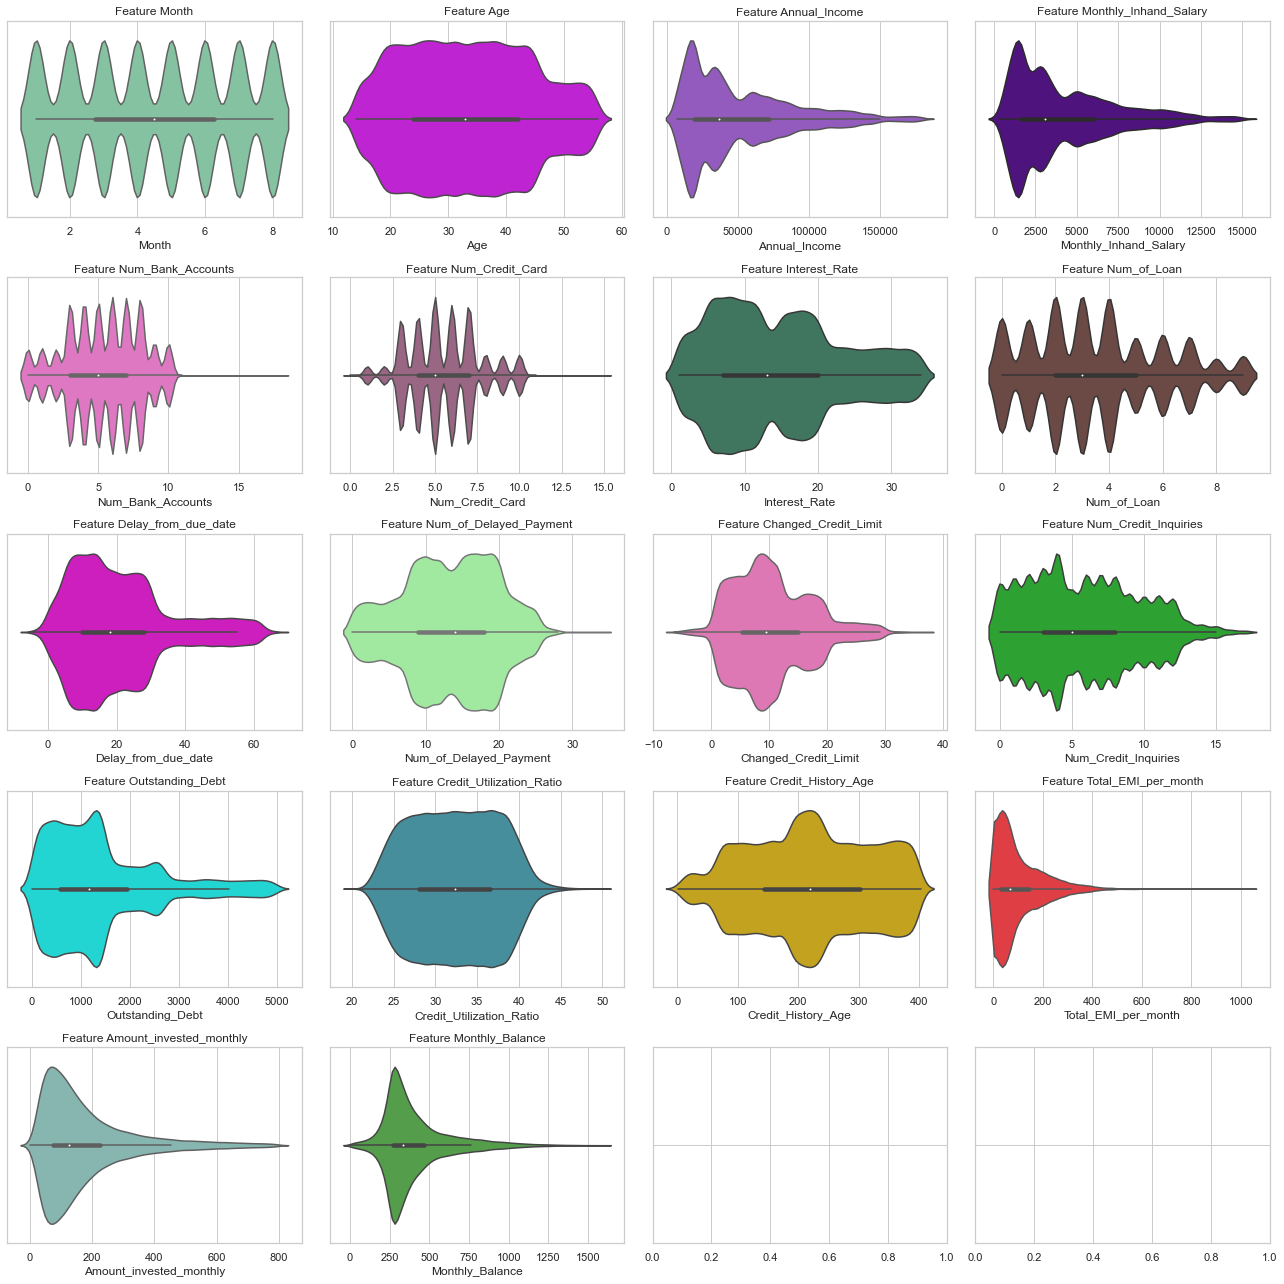

In [86]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  


plt.tight_layout()

plt.show()

In [87]:
data

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,26.822620,265.0,True,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,266.0,True,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,267.0,True,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,268.0,True,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,269.0,True,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,34.663572,378.0,True,35.104023,60.971333,High_spent_Large_value_payments,270.099963,Poor
99996,0x25fea,CUS_0x942c,5,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,40.565631,379.0,True,35.104023,54.185950,High_spent_Medium_value_payments,270.099963,Poor
99997,0x25feb,CUS_0x942c,6,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,41.255522,380.0,True,35.104023,24.028477,High_spent_Large_value_payments,270.099963,Poor
99998,0x25fec,CUS_0x942c,7,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,33.638208,381.0,True,35.104023,251.672582,Low_spent_Large_value_payments,270.099963,Standard


## Visualization

Credit_Score                      Good  Poor  Standard
Payment_Behaviour                                     
High_spent_Large_value_payments   3574  3332      8442
High_spent_Medium_value_payments  3864  4978     10524
High_spent_Small_value_payments   2225  3269      6486
Low_spent_Large_value_payments    1960  3077      5881
Low_spent_Medium_value_payments   2622  4439      7560
Low_spent_Small_value_payments    3583  9903     14281


<AxesSubplot:ylabel='Payment_Behaviour'>

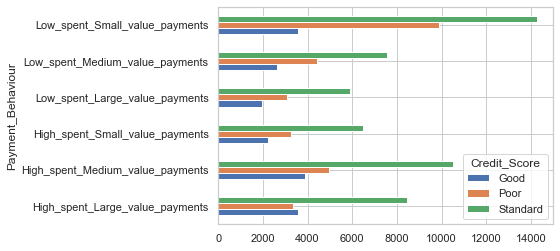

In [88]:
CrossTabResult = pd.crosstab(index=data['Payment_Behaviour'], columns=data['Credit_Score'])

print(CrossTabResult)
CrossTabResult.plot.barh()

Credit_Score   Good  Poor  Standard
Occupation                         
Accountant     1205  2037      3502
Architect      1233  1855      3736
Developer      1210  1924      3586
Doctor         1164  1804      3600
Engineer       1264  2094      3506
Entrepreneur   1185  2033      3430
Journalist     1254  1840      3442
Lawyer         1259  1965      3872
Manager        1190  1856      3386
Mechanic       1107  2044      3625
Media_Manager  1244  1764      3712
Musician       1192  1786      3374
Scientist      1201  2062      3481
Teacher        1224  2027      3421
Writer          896  1907      3501


<AxesSubplot:xlabel='Occupation'>

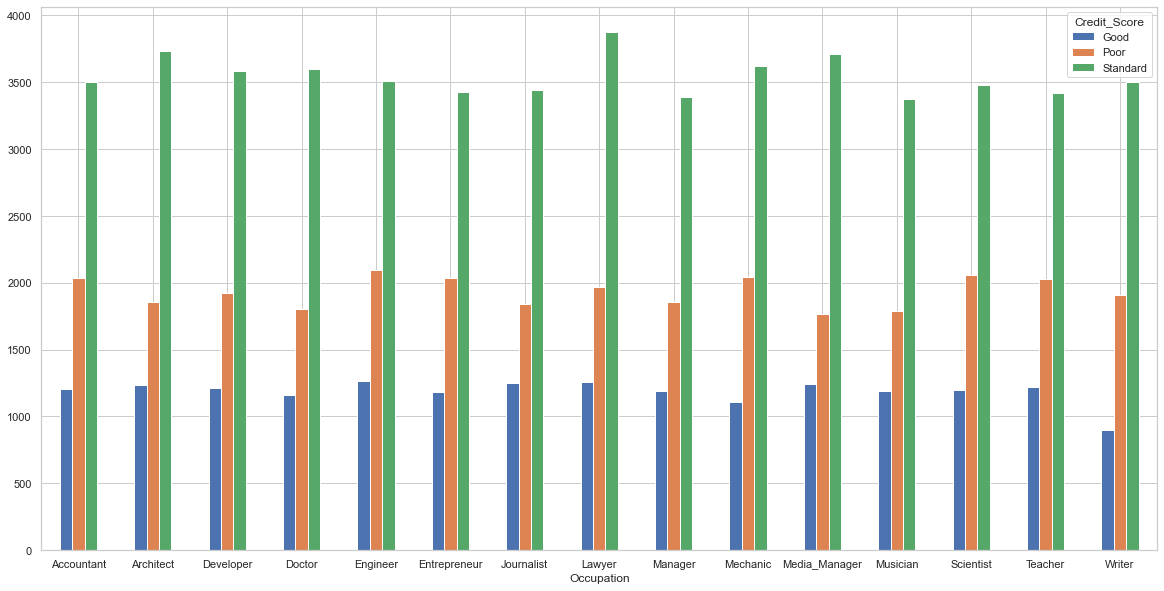

In [89]:
CrossTabResult = pd.crosstab(index=data['Occupation'], columns=data['Credit_Score'])

print(CrossTabResult)
CrossTabResult.plot.bar(figsize=(20,10), rot=0)

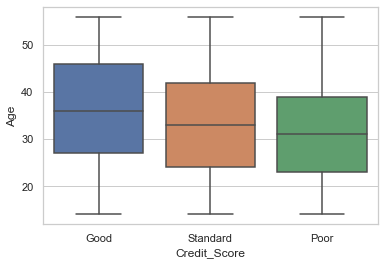

In [90]:
sns.boxplot(x='Credit_Score', y='Age', data=data)
plt.show()

In [91]:
data_backup = data.copy()

In [92]:
data_backup

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,26.822620,265.0,True,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,266.0,True,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,267.0,True,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,268.0,True,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,269.0,True,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,34.663572,378.0,True,35.104023,60.971333,High_spent_Large_value_payments,270.099963,Poor
99996,0x25fea,CUS_0x942c,5,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,40.565631,379.0,True,35.104023,54.185950,High_spent_Medium_value_payments,270.099963,Poor
99997,0x25feb,CUS_0x942c,6,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,41.255522,380.0,True,35.104023,24.028477,High_spent_Large_value_payments,270.099963,Poor
99998,0x25fec,CUS_0x942c,7,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,33.638208,381.0,True,35.104023,251.672582,Low_spent_Large_value_payments,270.099963,Standard


In [93]:
data = data_backup.copy()

In [94]:
data

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,26.822620,265.0,True,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.944960,266.0,True,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,28.609352,267.0,True,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,31.377862,268.0,True,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,269.0,True,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,34.663572,378.0,True,35.104023,60.971333,High_spent_Large_value_payments,270.099963,Poor
99996,0x25fea,CUS_0x942c,5,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,40.565631,379.0,True,35.104023,54.185950,High_spent_Medium_value_payments,270.099963,Poor
99997,0x25feb,CUS_0x942c,6,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,41.255522,380.0,True,35.104023,24.028477,High_spent_Large_value_payments,270.099963,Poor
99998,0x25fec,CUS_0x942c,7,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,33.638208,381.0,True,35.104023,251.672582,Low_spent_Large_value_payments,270.099963,Standard


## Data Preprocessing

### Encoding

Converting the Credit Score column in numerical

In [95]:
############################################ 
############# Encoding #####################

columns=[
      'Credit_Score']
for item in columns:
    data[item] = LabelEncoder().fit_transform(data[item])

columns = ['Payment_of_Min_Amount','Payment_Behaviour','Occupation','Credit_Mix', 'Type_of_Loan']
for item in columns:
    data[item] = ce.LeaveOneOutEncoder().fit_transform(data[item],data['Credit_Score'])
    
columns2 =['Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Total_EMI_per_month']
for item in columns2:
    mean_encoding = data.groupby([item])['Credit_Score'].mean()
    data[item] = data[item].map(mean_encoding)


X=data.drop('Credit_Score',axis=1)
y = data.Credit_Score

X.drop(['Customer_ID','ID'],axis=1,inplace=True)

## Modelling

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

In [97]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [99]:
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
specificity_scores = []

In [100]:
def cross_validation(X, y, model):
    scores = cross_val_score(model, X, y, cv=5)
    return (scores.mean(), scores.std() * 2)

In [101]:
def score_calculator(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(classification_report(y_test,y_pred_test))
    precision = precision_score(y_test,y_pred_test,average='micro')
    recall = recall_score(y_test,y_pred_test,average='micro')
    specificity = recall_score(y_test, y_pred_test, average='micro', pos_label=0)
    f1 = f1_score(y_test,y_pred_test,average='micro')
    y_pred_prob_test = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_prob_test, average='macro', multi_class='ovr')
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
    plt.show()
    return (y_pred_test, test_acc, precision, recall, auc, f1, specificity)

## LinearDiscriminantAnalysis Model

#### First we need to perform CV on the solver parameter in LinearDiscriminantAnalysis Model

In [102]:
solvers = ['svd', 'lsqr']
for solver in solvers:
    mean_acc, std_acc = cross_validation(X_train, y_train, LinearDiscriminantAnalysis(solver=solver))
    print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 0.986 (+/- 0.001)
Accuracy: 0.986 (+/- 0.001)


The accuracy score for both the models is the same so we can use either of them. Taking solver as lsqr lets perform prediction

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5866
           1       0.96      1.00      0.98      9633
           2       1.00      0.98      0.99     17501

    accuracy                           0.99     33000
   macro avg       0.99      0.99      0.99     33000
weighted avg       0.99      0.99      0.99     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


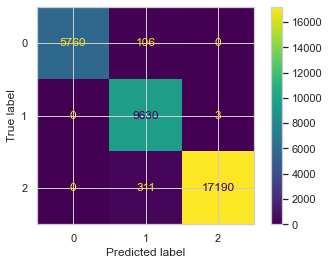

In [103]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train,y_train,X_test,y_test,LinearDiscriminantAnalysis(solver="lsqr"))
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('LinearDiscriminantAnalysis')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## GaussianNB Model

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      5866
           1       0.62      0.71      0.66      9633
           2       0.86      0.74      0.80     17501

    accuracy                           0.75     33000
   macro avg       0.73      0.76      0.74     33000
weighted avg       0.76      0.75      0.75     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


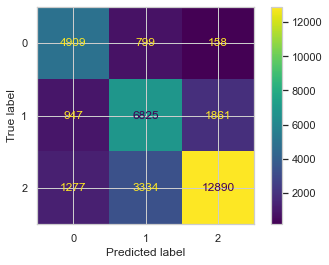

In [104]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train,y_train,X_test,y_test,GaussianNB())
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('GaussianNB')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Decision Tree Model

#### First we need to perform CV on the max_depth parameter in Decision Tree Model

In [105]:
max_depths = range(1,20)
for max_depth in max_depths:
    mean_acc, std_acc = cross_validation(X_train, y_train, tree.DecisionTreeClassifier(max_depth=max_depth))
    print("Max Depth: %0.1f /nAccuracy: %0.3f (+/- %0.3f)" % (max_depth, mean_acc, std_acc))

Max Depth: 1.0 /nAccuracy: 0.817 (+/- 0.001)
Max Depth: 2.0 /nAccuracy: 0.992 (+/- 0.001)
Max Depth: 3.0 /nAccuracy: 0.993 (+/- 0.001)
Max Depth: 4.0 /nAccuracy: 0.995 (+/- 0.002)
Max Depth: 5.0 /nAccuracy: 0.997 (+/- 0.001)
Max Depth: 6.0 /nAccuracy: 0.998 (+/- 0.002)
Max Depth: 7.0 /nAccuracy: 0.999 (+/- 0.001)
Max Depth: 8.0 /nAccuracy: 0.999 (+/- 0.001)
Max Depth: 9.0 /nAccuracy: 0.999 (+/- 0.000)
Max Depth: 10.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 11.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 12.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 13.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 14.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 15.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 16.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 17.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 18.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 19.0 /nAccuracy: 1.000 (+/- 0.000)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


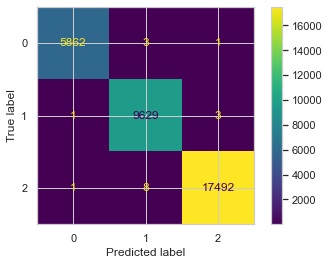

In [106]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train,y_train,X_test,y_test,tree.DecisionTreeClassifier())
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('DecisionTreeClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Logistic Regression

In [107]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [108]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [109]:
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, LogisticRegression(multi_class='multinomial'))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5866
           1       0.99      1.00      0.99      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      0.99      0.99     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


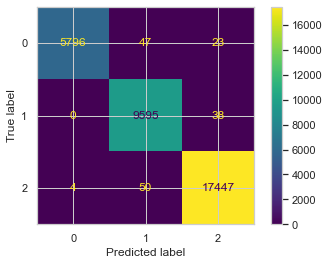

In [110]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,LogisticRegression(max_iter = 200, multi_class='multinomial'))
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('LogisticRegression')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## K-Nearest Neighbour (k-NN)

In [111]:
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, KNeighborsClassifier(n_neighbors=5))
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 0.962 (+/- 0.003)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5866
           1       0.94      0.95      0.94      9633
           2       0.97      0.97      0.97     17501

    accuracy                           0.96     33000
   macro avg       0.96      0.96      0.96     33000
weighted avg       0.96      0.96      0.96     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


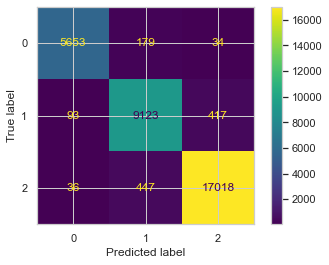

In [112]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,KNeighborsClassifier(n_neighbors=5))
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('KNeighborsClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Artificial Neural Networks (ANN)

In [113]:
model = MLPClassifier(hidden_layer_sizes=(100, ), learning_rate_init=0.001,alpha=1, momentum=0.9,max_iter=1000)
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 0.994 (+/- 0.001)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5866
           1       0.99      1.00      0.99      9633
           2       1.00      1.00      1.00     17501

    accuracy                           0.99     33000
   macro avg       0.99      0.99      0.99     33000
weighted avg       0.99      0.99      0.99     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


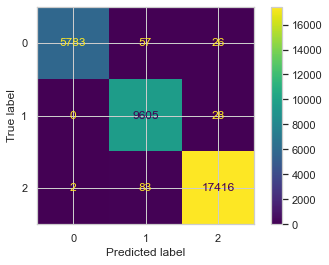

In [114]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,model)
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('MLPClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Support Vector Machines (SVM)

In [115]:
model = svm.SVC(kernel='linear', C=50, probability=True)
# mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
# print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5866
           1       0.99      0.99      0.99      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      0.99      0.99     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


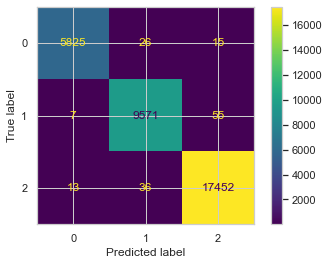

In [116]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,model)
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('SVC')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Random Forest

In [117]:
model = RandomForestClassifier(n_estimators=200)
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 1.000 (+/- 0.000)


              precision    recall  f1-score   support

           0       0.47      0.73      0.57      5866
           1       0.99      0.89      0.94      9633
           2       0.87      0.76      0.81     17501

    accuracy                           0.79     33000
   macro avg       0.78      0.79      0.77     33000
weighted avg       0.83      0.79      0.81     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


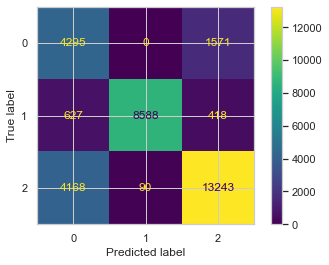

In [118]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,model)
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('RandomForestClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Bagging

In [119]:
model = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5)
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 1.000 (+/- 0.001)


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5866
           1       1.00      0.87      0.93      9633
           2       0.99      0.99      0.99     17501

    accuracy                           0.96     33000
   macro avg       0.94      0.95      0.94     33000
weighted avg       0.96      0.96      0.96     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


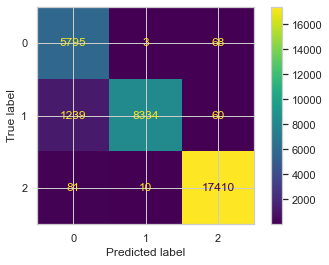

In [120]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,model)
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('BaggingClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Boosting

In [121]:
model = AdaBoostClassifier(tree.DecisionTreeClassifier(),n_estimators=10,algorithm='SAMME',learning_rate=0.5)
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

Accuracy: 1.000 (+/- 0.000)


              precision    recall  f1-score   support

           0       0.18      0.13      0.15      5866
           1       0.99      0.45      0.62      9633
           2       0.71      0.99      0.82     17501

    accuracy                           0.68     33000
   macro avg       0.63      0.52      0.53     33000
weighted avg       0.70      0.68      0.65     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


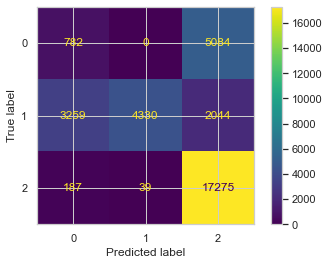

In [122]:
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled,y_train,X_test_scaled,y_test,model)
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('AdaBoostClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Result

In [123]:
model_report = pd.DataFrame({'model_names': model_names, 'accuracy_scores': accuracy_scores, 'precision_scores': precision_scores, 'recall_scores': recall_scores, 'f1_scores':recall_scores, 'specificity_scores': specificity_scores, 'auc_scores': auc_scores})

In [124]:
model_report.to_csv('model_report.csv')